<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Amazon_rating__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
from collections import Counter
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
stop_words=stopwords.words('english')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df=pd.read_csv('/content/drive/MyDrive/amazonReview.csv')

In [5]:
df.head(7)

,Reviewer name,title,Review body,Review rating,sentiment
0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive
5,WR,Fadoo sound quality.😎🤘👏🙌,A real value for money product.Sound quality- ...,5.0 out of 5 stars,positive
6,Maghi,Awesome sound quality and worth of buy the pro...,Very good quality superb,5.0 out of 5 stars,positive


In [ ]:
Counter (df['Review rating'])

Counter({'1.0 out of 5 stars': 35191,
         '2.0 out of 5 stars': 11411,
         '3.0 out of 5 stars': 17819,
         '4.0 out of 5 stars': 106584,
         '5.0 out of 5 stars': 240739,
         nan: 38035})

Counter({'1.0 out of 5 stars': 35191,
         '2.0 out of 5 stars': 11411,
         '3.0 out of 5 stars': 17819,
         '4.0 out of 5 stars': 106584,
         '5.0 out of 5 stars': 240739,
         nan: 38035})

In [ ]:
Counter (df['sentiment'])

Counter({'negative': 66657, 'positive': 383122})

review rating prediction

In [6]:
df_review= df.copy()

In [7]:
df_review= df_review[df_review['Review rating'].notna()]

In [ ]:
Counter(df['Review rating'])

Counter({'1.0 out of 5 stars': 35191,
         '2.0 out of 5 stars': 11411,
         '3.0 out of 5 stars': 17819,
         '4.0 out of 5 stars': 106584,
         '5.0 out of 5 stars': 240739,
         nan: 38035})

In [8]:
df_review.reset_index(drop=True, inplace=True)

In [9]:
df_review[['Review rating','Review body']].groupby('Review rating').count()

,Review body
Review rating,
1.0 out of 5 stars,35190
2.0 out of 5 stars,11409
3.0 out of 5 stars,17819
4.0 out of 5 stars,106564
5.0 out of 5 stars,240706


In [ ]:
len(df_review)

411744

In [10]:
df_review[['Review rating','Review body']].groupby('Review rating').count()*100/len(df_review)

,Review body
Review rating,
1.0 out of 5 stars,8.546573
2.0 out of 5 stars,2.770896
3.0 out of 5 stars,4.327689
4.0 out of 5 stars,25.881130
5.0 out of 5 stars,58.460111


In [11]:
temp_=df_review[['Review rating','Review body']].groupby('Review rating').count()*100/len(df_review)

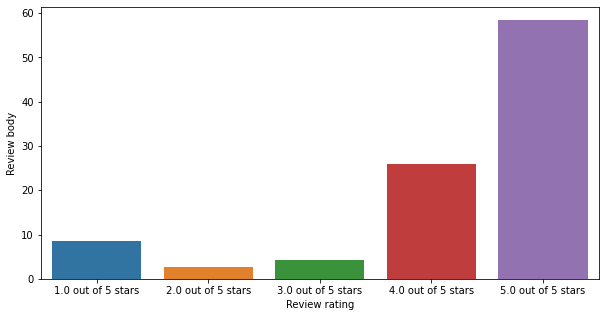

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=temp_.index, y=temp_['Review body'])
#sns.barplot(temp_.index,'Review body', data=temp_)
plt.show()

In [ ]:
len(temp_)

5

In [ ]:
len(temp_.sample(frac=0.5))

2

In [14]:
df_final=pd.DataFrame()

In [15]:
#undersampling of majority /class
temp_= temp_=df_review[df_review['Review rating']=='5.0 out of 5 stars']
temp_=temp_.sample(frac=0.5)
df_final=pd.concat([df_final,temp_],axis=0)

In [16]:
#Over Sampling
temp_= temp_=df_review[df_review['Review rating']=='1.0 out of 5 stars']
temp_=temp_.sample(frac=1.3, replace=True)
df_final=pd.concat([df_final,temp_],axis=0)

In [17]:
temp_= temp_=df_review[df_review['Review rating']=='2.0 out of 5 stars']
temp_=temp_.sample(frac=2.2, replace=True)
df_final=pd.concat([df_final,temp_],axis=0)

In [18]:
temp_= temp_=df_review[df_review['Review rating']=='3.0 out of 5 stars']
temp_=temp_.sample(frac=1.5, replace=True)
df_final=pd.concat([df_final,temp_],axis=0)

In [19]:
temp_= temp_=df_review[df_review['Review rating']=='4.0 out of 5 stars']
df_final=pd.concat([df_final,temp_],axis=0)

In [20]:
df_final.shape

(324534, 5)

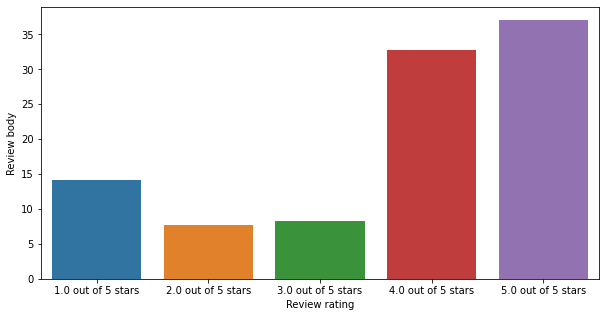

In [21]:
temp_=df_final[['Review rating', 'Review body']].groupby('Review rating').count()*100/len(df_final)
plt.figure(figsize=(10,5))
sns.barplot(x=temp_.index, y=temp_['Review body'])
#sns.barplot(temp_.index,'Review body', data=temp_)
plt.show()

In [22]:
df.final=df_final.sample(frac=1) #shuffling the database

In [23]:
df.final.reset_index(drop=True, inplace=True)

In [24]:
df_final.isnull().sum()

Reviewer name     1
title            50
Review body      38
Review rating     0
sentiment         0
dtype: int64

In [25]:
df_final.dropna(inplace=True)

In [26]:
df_final.isnull().sum()

Reviewer name    0
title            0
Review body      0
Review rating    0
sentiment        0
dtype: int64

MODEL BUILDING

In [27]:
x= df_final['Review body']
y= df_final['Review rating']

In [ ]:
x.shape

(324470, 2)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [29]:
pipe_line=make_pipeline(TfidfVectorizer(),LinearSVC(class_weight='balanced'))

In [30]:
pipe_line.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scal

In [31]:
f1_train= metrics.f1_score(y_train,pipe_line.predict(x_train))
f1_test= metrics.f1_score(y_test,pipe_line.predict(x_test))
cross_val= np.mean(cross_val_score(pipe_line, x_train,y_train, scoring='f1'))
print('F1-Score: \n Train:{} Test: {} Cross_val: {}'.format(f1_train,f1_test,cross_val))

ValueError: ignored

In [ ]:
metrics.get_scorer

TypeError: ignored

In [31]:
print(metrics.classification_report(y_test,pipe_line.predict(x_test)))

                    precision    recall  f1-score   support

1.0 out of 5 stars       0.68      0.79      0.73     13842
2.0 out of 5 stars       0.47      0.57      0.51      7535
3.0 out of 5 stars       0.40      0.46      0.42      7893
4.0 out of 5 stars       0.58      0.47      0.52     31957
5.0 out of 5 stars       0.67      0.69      0.68     36111

          accuracy                           0.60     97338
         macro avg       0.56      0.60      0.57     97338
      weighted avg       0.60      0.60      0.60     97338



In [33]:
x= df_final['Review body']+ df_final['title']
y= df_final['Review rating']

In [ ]:
x.shape

(324470, 2)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
df.loc[36884] ['Review body']

'I am writing after 3 days of use, I can say the earphones are light weight and form good fit. The battery life is also pretty good'

In [ ]:
x.loc[36884]

'I am writing after 3 days of use, I can say the earphones are light weight and form good fit. The battery life is also pretty goodGood fit'

In [ ]:
x.head(5)

36884     I am writing after 3 days of use, I can say th...
50093     I Purchased this earphones great Indian festiv...
197644    Nice earbud s good sound quality best bass qua...
277669    Superbly matches the screen size of Redmi Note...
241111    Worst earphone. Earphones stopped working afte...
dtype: object

In [35]:
x_train.shape

(227123,)

In [ ]:
y_train.shape

(227129,)

In [36]:
pipe_line=make_pipeline(TfidfVectorizer(),LinearSVC(class_weight='balanced'))
pipe_line.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scal

In [37]:
print(metrics.classification_report(y_test,pipe_line.predict(x_test)))

                    precision    recall  f1-score   support

1.0 out of 5 stars       0.75      0.83      0.79     13773
2.0 out of 5 stars       0.57      0.67      0.62      7588
3.0 out of 5 stars       0.49      0.57      0.53      7926
4.0 out of 5 stars       0.61      0.53      0.57     31941
5.0 out of 5 stars       0.70      0.70      0.70     36111

          accuracy                           0.65     97339
         macro avg       0.62      0.66      0.64     97339
      weighted avg       0.65      0.65      0.65     97339



In [ ]:
Counter(df['sentiment'])

Counter({'negative': 66657, 'positive': 383122})

In [38]:
df['sentiment']= np.where(df['sentiment']=='positive',1,0)

In [ ]:
Counter(df['sentiment'])

Counter({0: 66657, 1: 383122})

In [39]:
x= df_final['Review body']+ df_final['title']
y= df_final['sentiment']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
pipe_line=make_pipeline(TfidfVectorizer(),LinearSVC(class_weight='balanced'))
pipe_line.fit(x_train,y_train)
print(metrics.classification_report(y_test,pipe_line.predict(x_test)))

              precision    recall  f1-score   support

    negative       0.81      0.91      0.86     29286
    positive       0.96      0.91      0.93     68053

    accuracy                           0.91     97339
   macro avg       0.88      0.91      0.89     97339
weighted avg       0.91      0.91      0.91     97339



                    precision    recall  f1-score   support

1.0 out of 5 stars       0.74      0.85      0.79     13774
2.0 out of 5 stars       0.70      0.53      0.61      7546
3.0 out of 5 stars       0.67      0.41      0.51      7970
4.0 out of 5 stars       0.56      0.56      0.56     31960
5.0 out of 5 stars       0.66      0.71      0.68     36091

          accuracy                           0.64     97341
         macro avg       0.67      0.61      0.63     97341
      weighted avg       0.64      0.64      0.64     97341



In [2]:
import pickle #saving model using pickle

In [34]:
#save the file to disk

filename= 'review_rating.sav'
pickle.dump(pipe_line, open(filename,'wb'))